# Import Dataset
using https://www.kaggle.com/zq1200/magnus-carlsen-lichess-games-dataset

In [1]:
import pandas as pd
# get the magnus carlsen dataset from kraggle
df = pd.read_csv('./dataset/chess/magnus/csv/csv/carlsen_games_moves.csv')
df.head()


,game_id,move_no,move_no_pair,player,notation,move,from_square,to_square,piece,color,...,fen_row8_black_count,fen_row1_black_value,fen_row2_black_value,fen_row3_black_value,fen_row4_black_value,fen_row5_black_value,fen_row6_black_value,fen_row7_black_value,fen_row8_black_value,move_sequence
0,b61b981c-e005-4064-8cc8-6feae75530b3,1,1,BabaRamdev,d4,d2d4,d2,d4,P,White,...,8,0,0,0,0,0,0,8,31,d4
1,b61b981c-e005-4064-8cc8-6feae75530b3,2,1,damnsaltythatsport,Nf6,g8f6,g8,f6,N,Black,...,7,0,0,0,0,0,3,8,28,d4|Nf6
2,b61b981c-e005-4064-8cc8-6feae75530b3,3,2,BabaRamdev,c4,c2c4,c2,c4,P,White,...,7,0,0,0,0,0,3,8,28,d4|Nf6|c4
3,b61b981c-e005-4064-8cc8-6feae75530b3,4,2,damnsaltythatsport,e6,e7e6,e7,e6,P,Black,...,7,0,0,0,0,0,4,7,28,d4|Nf6|c4|e6
4,b61b981c-e005-4064-8cc8-6feae75530b3,5,3,BabaRamdev,Nc3,b1c3,b1,c3,N,White,...,7,0,0,0,0,0,4,7,28,d4|Nf6|c4|e6|Nc3


# show the first 20 moves in the first game

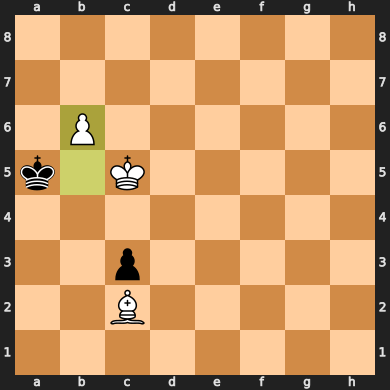

In [2]:
import chess
board = chess.Board()

# iterate over the first 20 moves of the first game

game_id = df['game_id'][0]
df1 = df[df['game_id'] == game_id]

for row in df1["move"]:
     board.push_uci(row)

board



In [3]:
import pandas as pd

df = pd.read_csv('./dataset/chess/magnus/csv/csv/carlsen_games_moves.csv')
game_ids = df['game_id'].unique()
game_index = 0
game_id = game_ids[game_index]
df_train = df[df['game_id'] == game_id]




In [4]:
eval = df_train.iloc[3]
moves = eval["move_sequence"]
print(moves)

d4|Nf6|c4|e6


In [5]:
for idx in range(len(df_train)):
    moves = df_train.iloc[idx]["fen"].split(" ")
    outcome = 1
    print(moves)

['rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR']
['rnbqkb1r/pppppppp/5n2/8/3P4/8/PPP1PPPP/RNBQKBNR']
['rnbqkb1r/pppppppp/5n2/8/2PP4/8/PP2PPPP/RNBQKBNR']
['rnbqkb1r/pppp1ppp/4pn2/8/2PP4/8/PP2PPPP/RNBQKBNR']
['rnbqkb1r/pppp1ppp/4pn2/8/2PP4/2N5/PP2PPPP/R1BQKBNR']
['rnbqk2r/ppppbppp/4pn2/8/2PP4/2N5/PP2PPPP/R1BQKBNR']
['rnbqk2r/ppppbppp/4pn2/8/2PPP3/2N5/PP3PPP/R1BQKBNR']
['rnbq1rk1/ppppbppp/4pn2/8/2PPP3/2N5/PP3PPP/R1BQKBNR']
['rnbq1rk1/ppppbppp/4pn2/8/2PPP3/2NB4/PP3PPP/R1BQK1NR']
['rnbq1rk1/ppp1bppp/3ppn2/8/2PPP3/2NB4/PP3PPP/R1BQK1NR']
['rnbq1rk1/ppp1bppp/3ppn2/8/2PPP3/2NB1N2/PP3PPP/R1BQK2R']
['rnbq1rk1/ppp1bppp/3p1n2/4p3/2PPP3/2NB1N2/PP3PPP/R1BQK2R']
['rnbq1rk1/ppp1bppp/3p1n2/4p3/2PPP3/2NB1N2/PP3PPP/R1BQ1RK1']
['rnbq1rk1/ppp1bppp/3p1n2/8/2PpP3/2NB1N2/PP3PPP/R1BQ1RK1']
['rnbq1rk1/ppp1bppp/3p1n2/8/2PNP3/2NB4/PP3PPP/R1BQ1RK1']
['rnbq1rk1/pp2bppp/2pp1n2/8/2PNP3/2NB4/PP3PPP/R1BQ1RK1']
['rnbq1rk1/pp2bppp/2pp1n2/8/2PNPB2/2NB4/PP3PPP/R2Q1RK1']
['rnbqr1k1/pp2bppp/2pp1n2/8/2PNPB2/2NB4/PP3PPP/R2Q1RK

In [6]:
import numpy as np
from random import randrange
from torch.utils.data import IterableDataset
import torch
from torch.nn.utils.rnn import pad_sequence
import pandas as pd
from torch.utils.data import Dataset


class EvaluationDataset(IterableDataset):
    def __init__(self, count, csv_file):
        self.count = count
        self.df = pd.read_csv(csv_file)
        
    def __iter__(self):
        return self 
    def __next__(self):
        return self.__getitem__(randrange(self.count))
    def __len__(self):
        return self.count
    def __getitem__(self, idx):

        game_ids = self.df['game_id'].unique()
        game_index = 0
        game_id = game_ids[game_index]
        df_train = df[df['game_id'] == game_id]

        eval = df_train.iloc[idx]
        outcome = 1
        outcome = np.array([outcome], dtype=np.single)

        moves = eval["fen"]
        moves = np.frombuffer(bytes(moves, 'utf-8'), dtype=np.uint8)
        moves = np.unpackbits(moves, axis=0).astype(np.single)
        moves = torch.tensor(moves,   dtype=torch.float32)
        
        #pad the moves to 808 size with zeros
        moves = torch.nn.functional.pad(moves, (0, 808 - moves.size(0)), 'constant', -1)

    
        
        outcome = torch.tensor(outcome,   dtype=torch.float32)
        # create a 808 size tensor of zeros
        # moves = torch.zeros(1, 808, dtype=torch.float32)




        return moves, outcome


/Users/fionnbarrett/Documents/ISE/Code/cs4422/python/venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# train_loader = EvaluationDataset(10)
# for i, (data, labels) in enumerate(train_loader):
#   # print(data.shape, labels.shape)
#   # print(data,labels)

#   # decode tensor to np uint8
#   data = data.numpy()
#   # data = np.packbits(data.astype(np.uint8), axis=0)
#   # data = data.tobytes().decode('utf-8')
#   # remove the padding
#   data = data[data != -1]
#   # decode a tensor to 
#   # data = data.astype(np.uint8).tobytes().decode('utf-8')
#   print(data.length)
  

#   break;

In [8]:
class CustomDataset(Dataset):
    def __init__(self, csv_file, count):
        self.data = pd.read_csv(csv_file)
        self.count = count
   
    def __len__(self):
        return self.count

    def __getitem__(self, idx):

        game_ids = self.data['game_id'].unique()
        game_index = 0
        game_id = game_ids[game_index]
        df_train = df[df['game_id'] == game_id]

        eval = df_train.iloc[idx]
        outcome = 1
        outcome = np.array([outcome], dtype=np.single)

        moves = eval["fen"]
        moves = np.frombuffer(bytes(moves, 'utf-8'), dtype=np.uint8)
        moves = np.unpackbits(moves, axis=0).astype(np.single)
        moves = torch.tensor(moves,   dtype=torch.float32)
        
        #pad the moves to 808 size with zeros
        moves = torch.nn.functional.pad(moves, (0, 808 - moves.size(0)), 'constant', -1)

    
        
        outcome = torch.tensor(outcome,   dtype=torch.float32)
        # create a 808 size tensor of zeros
        # moves = torch.zeros(1, 808, dtype=torch.float32)
        return moves, outcome
        

In [10]:
import warnings
# import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# plt.ion() 



In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
from torch.optim import Adam
from collections import OrderedDict
from torch.utils.data import DataLoader


class EvaluationModel(pl.LightningModule):
    def __init__(self, learning_rate = 1e-3, batch_size = 1024, layer_count=10):
        super().__init__()
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        layers=[]
        for i in range(layer_count-1):
            layers.append((f"linear-{i}",nn.Linear(808, 808)))
            layers.append((f"relu-{i}",nn.ReLU()))
        layers.append((f"linear-{layer_count-1}",nn.Linear(808, 1)))
        self.seq = nn.Sequential(OrderedDict(layers))
    def forward(self, x):
        return self.seq(x)
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.l1_loss(y_hat, y)
        self.log('train_loss', loss)
        return loss
    
    def configure_optimizers(self):
        return Adam(self.parameters(), lr=self.learning_rate)

    def train_dataloader(self):
        # dataset = EvaluationDataset(20, './dataset/chess/magnus/csv/csv/carlsen_games_moves.csv')

        dataset = CustomDataset('./dataset/chess/magnus/csv/csv/carlsen_games_moves.csv', 20)
        return DataLoader(dataset, batch_size=self.batch_size, pin_memory=True)

In [12]:
model = EvaluationModel()
trainer = pl.Trainer(accelerator="gpu",)
trainer.fit(model)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type       | Params
------------------------------------
0 | seq  | Sequential | 5.9 M 
------------------------------------
5.9 M     Trainable params
0         Non-trainable params
5.9 M     Total params
23.535    Total estimated model params size (MB)


Epoch 999: 100%|██████████| 1/1 [00:01<00:00,  1.76s/it, loss=0.00991, v_num=6]

`Trainer.fit` stopped: `max_epochs=1000` reached.


Epoch 999: 100%|██████████| 1/1 [00:01<00:00,  1.83s/it, loss=0.00991, v_num=6]


In [ ]:
# save the model
torch.save(model.state_dict(), './model.pth')

In [ ]:
# load the model and test it
model = EvaluationModel()
model.load_state_dict(torch.load('./model.pth'))
model.eval()

EvaluationModel(
  (seq): Sequential(
    (linear-0): Linear(in_features=808, out_features=808, bias=True)
    (relu-0): ReLU()
    (linear-1): Linear(in_features=808, out_features=808, bias=True)
    (relu-1): ReLU()
    (linear-2): Linear(in_features=808, out_features=808, bias=True)
    (relu-2): ReLU()
    (linear-3): Linear(in_features=808, out_features=808, bias=True)
    (relu-3): ReLU()
    (linear-4): Linear(in_features=808, out_features=808, bias=True)
    (relu-4): ReLU()
    (linear-5): Linear(in_features=808, out_features=808, bias=True)
    (relu-5): ReLU()
    (linear-6): Linear(in_features=808, out_features=808, bias=True)
    (relu-6): ReLU()
    (linear-7): Linear(in_features=808, out_features=808, bias=True)
    (relu-7): ReLU()
    (linear-8): Linear(in_features=808, out_features=808, bias=True)
    (relu-8): ReLU()
    (linear-9): Linear(in_features=808, out_features=1, bias=True)
  )
)

In [ ]:

# have it predict a random move
import numpy as np
from random import randrange
from torch.utils.data import IterableDataset
import torch
from torch.nn.utils.rnn import pad_sequence

df = pd.read_csv('./dataset/chess/magnus/csv/csv/carlsen_games_moves.csv')
game_ids = df['game_id'].unique()
game_index = 1
game_id = game_ids[game_index]
df_train = df[df['game_id'] == game_id]

eval = df_train.iloc[3]






In [ ]:
moves = eval["fen"]
print(moves)
moves = np.frombuffer(bytes(moves, 'utf-8'), dtype=np.uint8)
moves = np.unpackbits(moves, axis=0).astype(np.single)
moves = torch.tensor(moves,   dtype=torch.float32)

 
# create a 808 size tensor of zeros

#pad the moves to 808 size with zeros
moves = torch.nn.functional.pad(moves, (0, 808 - moves.size(0)), 'constant', -1)
print(moves.shape)
# moves = torch.zeros(808, dtype=torch.float32)
# print(moves)

# predict the outcome
outcome = model(moves)
print(outcome)

data = outcome.detach().numpy()
print(data)




rnbqkb1r/ppp1pppp/5n2/3p4/8/N1P5/PP1PPPPP/R1BQKBNR
torch.Size([808])
tensor([-0.0345], grad_fn=<AddBackward0>)
[-0.0345376]
